<a href="https://colab.research.google.com/github/kenanmorani/Audio_Signal_Processing_For_Music_Applications_idu/blob/main/CIFAR-100/CNN6_cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall keras
!pip install keras

Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras import backend as K
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 100
NUM_CLASSES = 100
EPOCHS = 200
INIT_DROPOUT_RATE = 0.5
MOMENTUM_RATE = 0.9
INIT_LEARNING_RATE = 0.01
L2_DECAY_RATE = 0.0005
CROP_SIZE = 32
LOG_DIR = './logs'
MODEL_PATH = './keras_cifar100_model.h5'

In [4]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [5]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


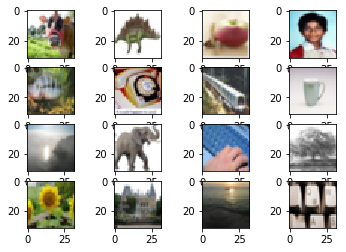

In [ ]:
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [6]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print(y_train.shape,y_test.shape)

(50000, 100) (10000, 100)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [8]:
model = Sequential()
model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
# Stack 1:
model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 2:
model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 3:
model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 4:
model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 5:
model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 6:
model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 7:
model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
model.add(Flatten())
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 384)       10752     
_________________________________________________________________
activation (Activation)      (None, 40, 40, 384)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 384)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 384)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 384)       147840    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 384)       5

In [10]:
def lr_scheduler(epoch, lr, step_decay = 0.1):
    return float(lr * step_decay) if epoch == 35.000 else lr

In [12]:
def dr_scheduler(epoch, layers, rate_list = [0.0, .1, .2, .3, .4, .5, 0.0], rate_factor = 1.5):
    if epoch == 85000:
        for i, layer in enumerate([l for l in layers if "dropout" in np.str.lower(l.name)]):
            layer.rate = layer.rate + rate_list[i]
    elif epoch == 135000:
        for i, layer in enumerate([l for l in layers if "dropout" in np.str.lower(l.name)]):
            layer.rate = layer.rate + layer.rate * rate_factor if layer.rate <= 0.66 else 1
    return layers

In [13]:
class StepLearningRateSchedulerAt(LearningRateScheduler):
    def __init__(self, schedule, verbose = 0): 
        super(LearningRateScheduler, self).__init__()
        self.schedule = schedule
        self.verbose = verbose
    
    def on_epoch_begin(self, epoch, logs=None): 
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
            
        lr = float(K.get_value(self.model.optimizer.lr))
        lr = self.schedule(epoch, lr)
       
        if not isinstance(lr, (float, np.float32, np.float64)):
            raise ValueError('The output of the "schedule" function ' 'should be float.')
        
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0: 
            print('\nEpoch %05d: LearningRateScheduler reducing learning ' 'rate to %s.' % (epoch + 1, lr))

In [14]:

class DropoutRateScheduler(Callback):
    def __init__(self, schedule, verbose = 0):
        super(Callback, self).__init__()
        self.schedule = schedule
        self.verbose = verbose
        
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model, 'layers'):
            raise ValueError('Model must have a "layers" attribute.')
            
        layers = self.model.layers
        layers = self.schedule(epoch, layers)
        
        if not isinstance(layers, list):
            raise ValueError('The output of the "schedule" function should be list.')
        
        self.model.layers = layers
        
        if self.verbose > 0:
            for layer in [l for l in self.model.layers if "dropout" in np.str.lower(l.name)]:
                print('\nEpoch %05d: Dropout rate for layer %s: %s.' % (epoch + 1, layer.name, layer.rate))

In [15]:
def random_crop(img, random_crop_size):
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

In [16]:
def crop_generator(batches, crop_length, num_channel = 3):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, num_channel))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [17]:
opt = SGD(lr=INIT_LEARNING_RATE, momentum=MOMENTUM_RATE)

In [18]:

lr_rate_scheduler = StepLearningRateSchedulerAt(lr_scheduler)
dropout_scheduler = DropoutRateScheduler(dr_scheduler)
tensorboard = TensorBoard(log_dir=LOG_DIR, batch_size=BATCH_SIZE)
checkpointer = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=1, save_best_only=True)

In [35]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])

In [20]:
datagen = ImageDataGenerator(samplewise_center=True,
                             zca_whitening=True,
                             horizontal_flip=True
                            )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [21]:
datagen.fit(x_train)

In [22]:
train_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
train_flow_w_crops = crop_generator(train_flow, CROP_SIZE)
valid_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [26]:
h=model.fit_generator(train_flow_w_crops,
                    epochs=200,
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    validation_data=valid_flow,
                    validation_steps=(len(x_train) / BATCH_SIZE))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
500/500 [==============================] - 244s 469ms/step - loss: 11.1502 - accuracy: 0.0150 - top_k_categorical_accuracy: 0.0738 - val_loss: 10.5278 - val_accuracy: 0.0212 - val_top_k_categorical_accuracy: 0.1055
Epoch 2/200
500/500 [==============================] - 234s 469ms/step - loss: 10.2104 - accuracy: 0.0421 - top_k_categorical_accuracy: 0.1692 - val_loss: 9.3673 - val_accuracy: 0.0994 - val_top_k_categorical_accuracy: 0.3078
Epoch 3/200
500/500 [==============================] - 235s 469ms/step - loss: 9.2842 - accuracy: 0.0884 - top_k_categorical_accuracy: 0.2970 - val_loss: 8.4994 - val_accuracy: 0.1553 - val_top_k_categorical_accuracy: 0.4179
Epoch 4/200
500/500 [==============================] - 235s 471ms/step - loss: 8.4928 - accuracy: 0.1374 - top_k_categorical_accuracy: 0.3940 - val_loss: 7.6987 - val_accuracy: 0.2201 - val_top_k_categorical_accuracy: 0.5256
Epoch 5/200
500/500 [==============================] - 234s 468ms/step - loss: 7.8124 - accuracy:

KeyboardInterrupt: ignored

In [28]:
plt.plot(h.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('EPOCHS')
plt.ylable('Accuracy')
plt.show()

NameError: ignored

In [30]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy: %0.4f%%' % (score[0] * 100))

313/313 [==============================] - 12s 36ms/step - loss: 9.3318 - accuracy: 0.0182 - top_k_categorical_accuracy: 0.0770
Test Accuracy: 933.1774%


In [ ]:
hh=model.fit_generator(train_flow_w_crops,
                    epochs=EPOCHS,
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    callbacks=[lr_rate_scheduler, tensorboard, checkpointer],
                    validation_data=valid_flow,
                    validation_steps=(len(x_train) / BATCH_SIZE))